# Python and Data Science
## Mariana Lopes
### 28/07/2016

# Trabalhando com o Jupyter
Ferramenta que permite criação de código, visualização de resultados e documentação no mesmo documento (.ipynb)

**Modo de comando:** `esc` para ativar, o cursor fica inativo

**Modo de edição:** `enter` para ativar, modo de inserção

### Atalhos do teclado (MUITO úteis)
Para usar os atalhos descritos abaixo a célula deve estar selecionada porém não pode estar no modo de edição. 

* Para entrar do modo de comando: `esc`

* Criar nova célula abaixo: `b` (elow)
* Criar nova célula acima: `a` (bove)

* Recortar uma célula: `x`
* Copiar uma célula: `c`
* Colar uma cálula: `v`

* Executar uma célula e permanecer nela mesma: `ctrl + enter`
* Executar uma célula e mover para a próxima: `shift + enter`

* ** Para ver todos os atalhos, tecle `h`**

### Tipos de célula
**Code:** Para código Python

**Markdown:** Para documentação

Também existem **Raw NBConverter** e **Heading**

# Pandas (http://pandas.pydata.org/)
* Biblioteca Python para análise de dados
* Provê ferramentas de alta performance e fácil usabilidade para análise de dados

### Como instalar
* Anaconda (http://pandas.pydata.org/pandas-docs/stable/install.html#installing-pandas-with-anaconda)
    * Download anaconda: https://www.continuum.io/downloads
    * Instalar Anaconda: https://docs.continuum.io/anaconda/install
    * Disponível para `osx-64`, `linux-64`, `linux-32`, `win-64`, `win-32` e `Python 2.7`, `Python 3.4`, e `Python 3.5`
    * `conda install pandas`
* Pip
    * `pip install pandas`


# Matplotlib (http://matplotlib.org/)
* Biblioteca Python para plotar gráficos 2D

### Como instalar
* Anaconda (http://pandas.pydata.org/pandas-docs/stable/install.html#installing-pandas-with-anaconda)
    * Download anaconda: https://www.continuum.io/downloads
    * Instalar Anaconda: https://docs.continuum.io/anaconda/install
    * Disponível para `osx-64`, `linux-64`, `linux-32`, `win-64`, `win-32` e `Python 2.7`, `Python 3.4`, e `Python 3.5`
    * `conda install matplotlib`
* Pip
    * `pip install matplotlib`

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline

### Carregando um arquivo csv em um DataFrame do Pandas
* `pd.DataFrame.from_csv(file_name)`
     
     Se, ao usar este comando, você se deparar com um UnicodeDecodingError, adicione o parâmetro `encoding='utf-8'`

## cast.csv

In [2]:
%%time
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None, encoding='utf-8')

CPU times: user 6.83 s, sys: 284 ms, total: 7.11 s
Wall time: 9 s


## release_dates.csv

In [3]:
%%time
release_dates = pd.read_csv('data/release_dates.csv', index_col=None,
                            parse_dates=['date'], infer_datetime_format=True)

CPU times: user 768 ms, sys: 20 ms, total: 788 ms
Wall time: 1.23 s


## titles

In [4]:
cast.columns

Index(['title', 'year', 'name', 'type', 'character', 'n'], dtype='object')

In [5]:
titles = cast[['title', 'year']].drop_duplicates().reset_index(drop=True)
titles.head()

title  year
0         Suuri illusioni  1985
1     Battle of the Sexes  2017
2    Secret in Their Eyes  2015
3              Steve Jobs  2015
4  Straight Outta Compton  2015

**`df.head(n):`** 
* Visualizar as primeiras *n* linhas. 
* Default: *n = 5*.

In [6]:
cast.head()

title  year     name   type                character   n
0         Suuri illusioni  1985   Homo $  actor                   Guests  22
1     Battle of the Sexes  2017  $hutter  actor          Bobby Riggs Fan  10
2    Secret in Their Eyes  2015  $hutter  actor          2002 Dodger Fan NaN
3              Steve Jobs  2015  $hutter  actor  1988 Opera House Patron NaN
4  Straight Outta Compton  2015  $hutter  actor              Club Patron NaN

In [7]:
release_dates.head()

title  year      country       date
0   #73, Shaanthi Nivaasa  2007        India 2007-06-15
1                 #Beings  2015      Romania 2015-01-29
2  #Ewankosau saranghaeyo  2015  Philippines 2015-01-21
3                 #Horror  2015          USA 2015-11-20
4                 #Horror  2015           UK 2016-05-16

**`df.tail(n):`** 
* Visualizar as últimas *n* linhas. 
* Default: *n = 5*.

In [8]:
cast.tail()

title  year                         name  \
3523211                    Stuttur Frakki  1993    Sveinbj?rg ??rhallsd?ttir   
3523212                           Foxtrot  1988            Lilja ??risd?ttir   
3523213  Niceland (Population. 1.000.002)  2004    Sigr??ur J?na ??risd?ttir   
3523214                      U.S.S.S.S...  2003  Krist?n Andrea ??r?ard?ttir   
3523215                 Bye Bye Blue Bird  1999                 Rosa ? R?gvu   

            type               character   n  
3523211  actress              Flugfreyja  24  
3523212  actress                    D?ra  24  
3523213  actress            Woman in Bus  26  
3523214  actress  Afgr.dama ? bens?nst??  17  
3523215  actress       Pensionatv?rtinde NaN

In [9]:
release_dates.tail()

title  year      country       date
438481  xXx: The Return of Xander Cage  2017           UK 2017-01-20
438482  xXx: The Return of Xander Cage  2017          USA 2017-01-20
438483  xXx: The Return of Xander Cage  2017    Singapore 2017-01-26
438484  xXx: The Return of Xander Cage  2017  Netherlands 2017-02-02
438485  xXx: The Return of Xander Cage  2017       Sweden 2017-02-03

### Quantos registros há no conjunto?

**`len(df)`:**
* Tamanho do df

In [10]:
len(cast), len(release_dates)

(3523216, 438486)

### Quais são os possíveis valores para a coluna `type`?

**`df[col]`:**
* Visualizar uma coluna do df

ou

**`df.col`:**
* Se o nome da coluna não tiver, espaços, caracteres especiais ou for uma variável

**Obs:** Ao selecionar uma coluna e manipulá-la fora de um DataFrame, a mesma é tratada como uma **Série**.

In [11]:
cast['type']

0            actor
1            actor
2            actor
3            actor
4            actor
5            actor
6            actor
7            actor
8            actor
9            actor
10           actor
11           actor
12           actor
13           actor
14           actor
15           actor
16           actor
17           actor
18           actor
19           actor
20           actor
21           actor
22           actor
23           actor
24           actor
25           actor
26           actor
27           actor
28           actor
29           actor
            ...   
3523186    actress
3523187    actress
3523188    actress
3523189    actress
3523190    actress
3523191    actress
3523192    actress
3523193    actress
3523194    actress
3523195    actress
3523196    actress
3523197    actress
3523198    actress
3523199    actress
3523200    actress
3523201    actress
3523202    actress
3523203    actress
3523204    actress
3523205    actress
3523206    actress
3523207    a

In [12]:
cast.type.head()

0    actor
1    actor
2    actor
3    actor
4    actor
Name: type, dtype: object

In [13]:
c = 'type'
cast[c].head()    #cast.c.head() não vai funcionar!

0    actor
1    actor
2    actor
3    actor
4    actor
Name: type, dtype: object

**`df[col].unique()`:** 
* Mostrar os possíveis valores de uma coluna

In [14]:
cast['type'].unique()

array(['actor', 'actress'], dtype=object)

### Quantos atores e quantas atrizes há no conjunto?

**df[col].value_counts():**
* Contagem de quantos registros há para cada valor possível da coluna col (somente se col for categórica)

In [15]:
cast['type'].value_counts()

actor      2382581
actress    1140635
Name: type, dtype: int64

### Operações com colunas

In [16]:
h = cast.head()
h

title  year     name   type                character   n
0         Suuri illusioni  1985   Homo $  actor                   Guests  22
1     Battle of the Sexes  2017  $hutter  actor          Bobby Riggs Fan  10
2    Secret in Their Eyes  2015  $hutter  actor          2002 Dodger Fan NaN
3              Steve Jobs  2015  $hutter  actor  1988 Opera House Patron NaN
4  Straight Outta Compton  2015  $hutter  actor              Club Patron NaN

#### Operações Aritméticas

In [17]:
h.year // 10 * 10    # Década

0    1980
1    2010
2    2010
3    2010
4    2010
Name: year, dtype: int64

In [18]:
h

title  year     name   type                character   n
0         Suuri illusioni  1985   Homo $  actor                   Guests  22
1     Battle of the Sexes  2017  $hutter  actor          Bobby Riggs Fan  10
2    Secret in Their Eyes  2015  $hutter  actor          2002 Dodger Fan NaN
3              Steve Jobs  2015  $hutter  actor  1988 Opera House Patron NaN
4  Straight Outta Compton  2015  $hutter  actor              Club Patron NaN

#### Comparações

In [19]:
h.year > 2000

0    False
1     True
2     True
3     True
4     True
Name: year, dtype: bool

#### Filtrar

* Por valor específico de uma coluna

In [20]:
cast[cast.character == 'Macduff Child']

title  year                name     type      character   n
330970   Macbeth  1916   Francis Carpenter    actor  Macduff Child  17
2522775  Macbeth  1916        Thelma Burns  actress  Macduff Child  18
2672395  Macbeth  1916          Madge Dyer  actress  Macduff Child  19
3473368  Macbeth  1948  Christopher Welles  actress  Macduff Child  14

* Por colunas

In [21]:
h[['title', 'year']]

title  year
0         Suuri illusioni  1985
1     Battle of the Sexes  2017
2    Secret in Their Eyes  2015
3              Steve Jobs  2015
4  Straight Outta Compton  2015

* Por valor nulo ou não nulo

In [22]:
h[h.n.isnull()]

title  year     name   type                character   n
2    Secret in Their Eyes  2015  $hutter  actor          2002 Dodger Fan NaN
3              Steve Jobs  2015  $hutter  actor  1988 Opera House Patron NaN
4  Straight Outta Compton  2015  $hutter  actor              Club Patron NaN

In [23]:
h[h.n.notnull()]

title  year     name   type        character   n
0      Suuri illusioni  1985   Homo $  actor           Guests  22
1  Battle of the Sexes  2017  $hutter  actor  Bobby Riggs Fan  10

In [24]:
h

title  year     name   type                character   n
0         Suuri illusioni  1985   Homo $  actor                   Guests  22
1     Battle of the Sexes  2017  $hutter  actor          Bobby Riggs Fan  10
2    Secret in Their Eyes  2015  $hutter  actor          2002 Dodger Fan NaN
3              Steve Jobs  2015  $hutter  actor  1988 Opera House Patron NaN
4  Straight Outta Compton  2015  $hutter  actor              Club Patron NaN

* Por vetor de booleanos

In [25]:
h[[True, False, True, False, False]]

title  year     name   type        character   n
0       Suuri illusioni  1985   Homo $  actor           Guests  22
2  Secret in Their Eyes  2015  $hutter  actor  2002 Dodger Fan NaN

In [26]:
h.year > 2000

0    False
1     True
2     True
3     True
4     True
Name: year, dtype: bool

In [27]:
h[h.year > 2000]

title  year     name   type                character   n
1     Battle of the Sexes  2017  $hutter  actor          Bobby Riggs Fan  10
2    Secret in Their Eyes  2015  $hutter  actor          2002 Dodger Fan NaN
3              Steve Jobs  2015  $hutter  actor  1988 Opera House Patron NaN
4  Straight Outta Compton  2015  $hutter  actor              Club Patron NaN

In [28]:
h[(h.year > 2000) & (h.year < 2016)]    # & para 'and', | para 'or'

title  year     name   type                character   n
2    Secret in Their Eyes  2015  $hutter  actor          2002 Dodger Fan NaN
3              Steve Jobs  2015  $hutter  actor  1988 Opera House Patron NaN
4  Straight Outta Compton  2015  $hutter  actor              Club Patron NaN

* Preencher valores nulos

Por DataFrame

In [29]:
h.fillna(0)

title  year     name   type                character   n
0         Suuri illusioni  1985   Homo $  actor                   Guests  22
1     Battle of the Sexes  2017  $hutter  actor          Bobby Riggs Fan  10
2    Secret in Their Eyes  2015  $hutter  actor          2002 Dodger Fan   0
3              Steve Jobs  2015  $hutter  actor  1988 Opera House Patron   0
4  Straight Outta Compton  2015  $hutter  actor              Club Patron   0

Por coluna

In [30]:
h.n.fillna(0)

0    22
1    10
2     0
3     0
4     0
Name: n, dtype: float64

### Quantos atores atuaram em cada ano?

In [31]:
cast.year.value_counts()#.head(10)

2016    164640
2015    149184
2014    146374
2013    137873
2012    131953
2011    125506
2009    117216
2010    113260
2008     98559
2007     88767
2006     84437
2005     74201
2004     63637
2003     57218
2002     54358
2001     52584
2000     50681
1999     48716
1998     44270
1997     42837
1996     38230
1995     37007
1994     35432
1989     35366
1988     34587
1990     34004
1987     33543
1991     32478
1992     32444
1993     32210
         ...  
1919      7892
1916      7770
1918      7758
1929      7470
1927      7208
1925      7190
1928      7181
1926      6926
1922      6835
1921      6807
1924      6708
1923      6291
1915      5477
1914      3397
2018      1999
1913      1001
1912       392
1911       198
2019       184
2020       114
1910        68
1908        42
2021        20
1906        17
2022        16
1907         5
1909         3
1894         3
1900         2
1905         1
Name: year, dtype: int64

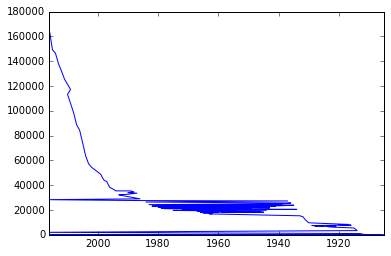

In [32]:
cast.year.value_counts().plot()

In [33]:
cast.year.value_counts().sort_index()#.head()

1894         3
1900         2
1905         1
1906        17
1907         5
1908        42
1909         3
1910        68
1911       198
1912       392
1913      1001
1914      3397
1915      5477
1916      7770
1917      8361
1918      7758
1919      7892
1920      8285
1921      6807
1922      6835
1923      6291
1924      6708
1925      7190
1926      6926
1927      7208
1928      7181
1929      7470
1930      9671
1931     11710
1932     14628
         ...  
1993     32210
1994     35432
1995     37007
1996     38230
1997     42837
1998     44270
1999     48716
2000     50681
2001     52584
2002     54358
2003     57218
2004     63637
2005     74201
2006     84437
2007     88767
2008     98559
2009    117216
2010    113260
2011    125506
2012    131953
2013    137873
2014    146374
2015    149184
2016    164640
2017     28329
2018      1999
2019       184
2020       114
2021        20
2022        16
Name: year, dtype: int64

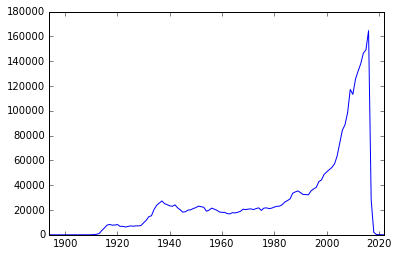

In [34]:
cast.year.value_counts().sort_index().plot()

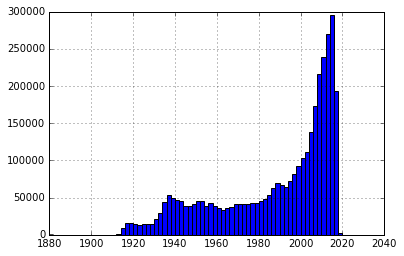

In [35]:
bins = pd.np.arange(1880, 2040, 2)
cast.year.hist(bins=bins)

### Qual foi a diferença entre o número de atores e atrizes que atuaram em cada década?

In [36]:
g = cast.groupby([cast.year // 10 * 10, 'type']).size()
g

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       26900
      actress     15414
1920  actor       47501
      actress     23400
1930  actor      149205
      actress     48819
1940  actor      159827
      actress     50689
1950  actor      153417
      actress     55802
1960  actor      128524
      actress     55161
1970  actor      146749
      actress     63656
1980  actor      191094
      actress     88247
1990  actor      256294
      actress    121334
2000  actor      482052
      actress    259606
2010  actor      640863
      actress    358439
2020  actor          99
      actress        51
dtype: int64

In [37]:
u = g.unstack()
u

type   actor  actress
year                 
1890       2        1
1900      54       16
1910   26900    15414
1920   47501    23400
1930  149205    48819
1940  159827    50689
1950  153417    55802
1960  128524    55161
1970  146749    63656
1980  191094    88247
1990  256294   121334
2000  482052   259606
2010  640863   358439
2020      99       51

In [38]:
a = u['actor'] - u['actress']
a

year
1890         1
1900        38
1910     11486
1920     24101
1930    100386
1940    109138
1950     97615
1960     73363
1970     83093
1980    102847
1990    134960
2000    222446
2010    282424
2020        48
dtype: int64

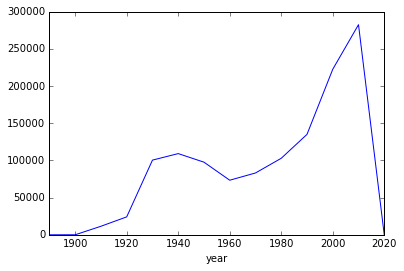

In [39]:
a.plot()

### Datas

In [40]:
release_dates.head()

title  year      country       date
0   #73, Shaanthi Nivaasa  2007        India 2007-06-15
1                 #Beings  2015      Romania 2015-01-29
2  #Ewankosau saranghaeyo  2015  Philippines 2015-01-21
3                 #Horror  2015          USA 2015-11-20
4                 #Horror  2015           UK 2016-05-16

In [41]:
release_dates.date.dt.year.head()

0    2007
1    2015
2    2015
3    2015
4    2016
Name: date, dtype: int64

In [42]:
release_dates.date.dt.dayofyear.head() # segunda=0, domingo=6

0    166
1     29
2     21
3    324
4    137
Name: date, dtype: int64

### Quanto % dos filmes foram lançados na sexta-feira?

In [43]:
len(release_dates[release_dates.date.dt.dayofweek == 4])*100/len(release_dates)

37.27963948677951

### Merge

In [44]:
cast.head()

title  year     name   type                character   n
0         Suuri illusioni  1985   Homo $  actor                   Guests  22
1     Battle of the Sexes  2017  $hutter  actor          Bobby Riggs Fan  10
2    Secret in Their Eyes  2015  $hutter  actor          2002 Dodger Fan NaN
3              Steve Jobs  2015  $hutter  actor  1988 Opera House Patron NaN
4  Straight Outta Compton  2015  $hutter  actor              Club Patron NaN

In [45]:
release_dates.head()

title  year      country       date
0   #73, Shaanthi Nivaasa  2007        India 2007-06-15
1                 #Beings  2015      Romania 2015-01-29
2  #Ewankosau saranghaeyo  2015  Philippines 2015-01-21
3                 #Horror  2015          USA 2015-11-20
4                 #Horror  2015           UK 2016-05-16

In [46]:
c = cast[cast.name == 'Ellen Page']
c = c.merge(release_dates)
c.head()

title  year        name     type      character  n  country  \
0  An American Crime  2007  Ellen Page  actress  Sylvia Likens  1   Sweden   
1  An American Crime  2007  Ellen Page  actress  Sylvia Likens  1   Greece   
2  An American Crime  2007  Ellen Page  actress  Sylvia Likens  1    Spain   
3  An American Crime  2007  Ellen Page  actress  Sylvia Likens  1  Finland   
4  An American Crime  2007  Ellen Page  actress  Sylvia Likens  1   Mexico   

        date  
0 2007-12-07  
1 2008-05-15  
2 2008-06-13  
3 2008-07-18  
4 2008-08-08

### Qual o nome e ano do filme mais antigo?

In [47]:
titles.sort_values('year').head(1)

title  year
130990  Miss Jerry  1894

### Quantos filmes são de 1960?

In [48]:
len(titles[titles.year == 1960])

1076

### Quantos filmes são de cada ano dos anos 70?

In [49]:
for y in range(1970, 1980):
    print(y, (titles.year == y).sum())

1970 1474
1971 1365
1972 1421
1973 1412
1974 1453
1975 1255
1976 1286
1977 1264
1978 1257
1979 1311


In [50]:
titles[titles.year // 10 == 197].year.value_counts().sort_index()

1970    1474
1971    1365
1972    1421
1973    1412
1974    1453
1975    1255
1976    1286
1977    1264
1978    1257
1979    1311
Name: year, dtype: int64

In [51]:
titles.groupby('year').size().loc[1970:1979]

year
1970    1474
1971    1365
1972    1421
1973    1412
1974    1453
1975    1255
1976    1286
1977    1264
1978    1257
1979    1311
dtype: int64

### Quantos filmes foram lançados desde o ano que você nasceu até hoje?

In [52]:
birth = 1990
len(titles[(titles.year >= birth) & (titles.year <= 2016)])

100215

### Quais são os nomes dos filmes até 1906?

In [53]:
titles[titles.year <= 1906][['title']]

title
114665         The Story of the Kelly Gang
130990                          Miss Jerry
140911                             Valsons
150054  The Joe Gans-Battling Nelson Fight
166249                       Lika mot lika
173596               Soldiers of the Cross

In [54]:
titles.year.min()

1894

In [55]:
titles.set_index('year').sort_index().loc[1894:1906]

title
year                                    
1894                          Miss Jerry
1900               Soldiers of the Cross
1905                             Valsons
1906         The Story of the Kelly Gang
1906                       Lika mot lika
1906  The Joe Gans-Battling Nelson Fight

### Quais são os 15 nomes de filmes mais comuns?

In [103]:
titles.title.value_counts().head(15)

Hamlet                       17
Macbeth                      15
Carmen                       13
The Outsider                 11
Maya                         11
She                          10
Anna Karenina                10
Vengeance                    10
Othello                      10
Temptation                   10
The Three Musketeers          9
Blood Money                   9
Underground                   9
A Midsummer Night's Dream     9
Rage                          9
Name: title, dtype: int64

### Em quantos filmes Judi Dench atuou?

In [106]:
len(cast[cast.name == 'Judi Dench'])

54

### Liste os filmes nos quais Judi Dench atuou como o ator número 1, ordenado por ano.

In [108]:
c = cast
c = c[c.name == 'Judi Dench']
c = c[c.n == 1]
c.sort_values('year')

title  year        name     type  \
2639086                       Mrs Brown  1997  Judi Dench  actress   
2639083              Ladies in Lavender  2004  Judi Dench  actress   
2639087          Mrs Henderson Presents  2005  Judi Dench  actress   
2639090              Notes on a Scandal  2006  Judi Dench  actress   
2639104  The Best Exotic Marigold Hotel  2011  Judi Dench  actress   
2639091                       Philomena  2013  Judi Dench  actress   

                    character  n  
2639086        Queen Victoria  1  
2639083                Ursula  1  
2639087  Mrs. Laura Henderson  1  
2639090        Barbara Covett  1  
2639104     Evelyn Greenslade  1  
2639091             Philomena  1

In [38]:
c =cast
c = c[c.name == 'Judi Dench']
c

title  year        name  \
2639061                              84 Charing Cross Road  1987  Judi Dench   
2639062                                  A Handful of Dust  1988  Judi Dench   
2639063                          A Midsummer Night's Dream  1968  Judi Dench   
2639064                                 A Room with a View  1985  Judi Dench   
2639065                                  A Study in Terror  1965  Judi Dench   
2639066             Angelina Ballerina: Angelina Sets Sail  2006  Judi Dench   
2639067                                      Casino Royale  2006  Judi Dench   
2639068                                           Chocolat  2000  Judi Dench   
2639069                                          Dead Cert  1974  Judi Dench   
2639070                                    Die Another Day  2002  Judi Dench   
2639071                                             Doogal  2006  Judi Dench   
2639072                                Four in the Morning  1965  Judi Dench   
2639073                                          GoldenEye  1995  Judi Dench   
2639074                                             Hamlet  1996  Judi Dench   
2639075                               He Who Rides a Tiger  1965  Judi Dench   
2639076                                            Henry V  1989  Judi Dench   
2639077                                  Home on the Range  2004  Judi Dench   
2639078                                               Iris  2001  Judi Dench   
2639079                                           J. Edgar  2011  Judi Dench   
2639080                                       Jack & Sarah  1995  Judi Dench   
2639081                                          Jane Eyre  2011  Judi Dench   
2639082  Kenneth Branagh Theatre Company's the Winter's...  2015  Judi Dench   
2639083                                 Ladies in Lavender  2004  Judi Dench   
2639084                                             Luther  1974  Judi Dench   
2639085        Miss Peregrine's Home for Peculiar Children  2016  Judi Dench   
2639086                                          Mrs Brown  1997  Judi Dench   
2639087                             Mrs Henderson Presents  2005  Judi Dench   
2639088                               My Week with Marilyn  2011  Judi Dench   
2639089                                               Nine  2009  Judi Dench   
2639090                                 Notes on a Scandal  2006  Judi Dench   
2639091                                          Philomena  2013  Judi Dench   
2639092        Pirates of the Caribbean: On Stranger Tides  2011  Judi Dench   
2639093                                  Pride & Prejudice  2005  Judi Dench   
2639094                                  Quantum of Solace  2008  Judi Dench   
2639095                                               Rage  2009  Judi Dench   
2639096                                  Run for Your Wife  2012  Judi Dench   
2639097                                      Schadenfreude  2016  Judi Dench   
2639098                                Shakespeare in Love  1998  Judi Dench   
2639099                                            Skyfall  2012  Judi Dench   
2639100                                            Spectre  2015  Judi Dench   
2639101                                    Stars in Shorts  2012  Judi Dench   
2639102                                 Tea with Mussolini  1999  Judi Dench   
2639103                           The Angelic Conversation  1985  Judi Dench   
2639104                     The Best Exotic Marigold Hotel  2011  Judi Dench   
2639105                          The Chronicles of Riddick  2004  Judi Dench   
2639106                    The Importance of Being Earnest  2002  Judi Dench   
2639107              The Second Best Exotic Marigold Hotel  2015  Judi Dench   
2639108                                  The Shipping News  2001  Judi Dench   
2639109                                   The Third Secret  1964  Judi Dench   
2639110                            The World Is Not E

### Liste os atores da versão de 1972 de Sleuth pela ordem do rank n.

In [40]:
c = cast
c = c[c.title == 'Sleuth']
c = c[c.year == 1972]
c.sort_values('n')

title  year                name     type  \
1605823  Sleuth  1972    Laurence Olivier    actor   
307018   Sleuth  1972       Michael Caine    actor   
351643   Sleuth  1972      Alec Cawthorne    actor   
1379549  Sleuth  1972  John (II) Matthews    actor   
2557108  Sleuth  1972  Eve (III) Channing  actress   
1363933  Sleuth  1972        Teddy Martin    actor   

                          character  n  
1605823                 Andrew Wyke  1  
307018                  Milo Tindle  2  
351643            Inspector Doppler  3  
1379549  Detective Sergeant Tarrant  4  
2557108             Marguerite Wyke  5  
1363933      Police Constable Higgs  6

### Quais atores mais atuaram em 1985?

In [111]:
cast[cast.year == 1985].name.value_counts().head(10)

Mammootty         21
Sukumari          19
Shakti Kapoor     19
Lou Scheimer      15
Mohanlal          15
Aruna Irani       14
Raj Babbar        14
Deven Verma       13
Rajesh Khanna     13
Pinchoo Kapoor    12
Name: name, dtype: int64

# SciKit Learn (http://scikit-learn.org)

* Biblioteca Python para mineração e análise de dados

### Como instalar
* Anaconda (http://pandas.pydata.org/pandas-docs/stable/install.html#installing-pandas-with-anaconda)
    * Download anaconda: https://www.continuum.io/downloads
    * Instalar Anaconda: https://docs.continuum.io/anaconda/install
    * Disponível para `osx-64`, `linux-64`, `linux-32`, `win-64`, `win-32` e `Python 2.7`, `Python 3.4`, e `Python 3.5`
    * `conda install scikit-learn`
* Pip
    * `pip install -U scikit-learn`

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
import pickle
import time
time1=time.strftime('%Y-%m-%d_%H-%M-%S')

### iris.csv

In [45]:
iris = pd.DataFrame.from_csv('iris.csv', index_col=None, encoding='utf-8')

In [46]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [47]:
target_data = iris['species']
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
feature_data = iris[features]

In [48]:
features_train, features_test, target_train, target_test = train_test_split(feature_data, target_data, test_size=0.33, random_state=42)

### Treinar modelo de Árvore de Decisão

In [49]:
dt = DecisionTreeClassifier()

target_data = iris['species']
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
feature_data = iris[features]

dt = dt.fit(features_train, target_train)

### Salvar modelo

In [50]:
with open('iris-dt_'+time1, 'bw') as f:
    pickle.dump(dt, f)
   

### Carregar modelo

In [51]:
with open('iris-dt_'+time1, 'br') as f:
    pickle.load(f)

### Predição para casos de teste

In [52]:
predictions = dt.predict(features_test)

confusion_matrix(target_test, predictions)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])